In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/amen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/amen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/amen/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:

stop_words = set(stopwords.words("english"))
lemmatizer = nltk.WordNetLemmatizer()

In [14]:
df = pd.read_excel("sample.xlsx")

In [15]:
def preprocess_text(text):
    """Cleans text: lowercasing, removing stopwords, lemmatizing"""
    words = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]  # Lemmatize and remove non-alphabetic
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

def extract_keywords(df, stage_col):
    """Extracts meaningful keywords from early or late-stage call notes"""
    all_words = []
    for text in df[stage_col].dropna():
        all_words.extend(preprocess_text(text))
    
    word_counts = Counter(all_words)
    return word_counts

def plot_top_keywords(word_counts, title, top_n=20):
    """Plots the top N keywords from a word count dictionary"""
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette="Blues_r")
    plt.xlabel("Frequency")
    plt.ylabel("Keywords")
    plt.title(title)
    plt.show()

/tmp/ipykernel_8630/3611975920.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Blues_r")


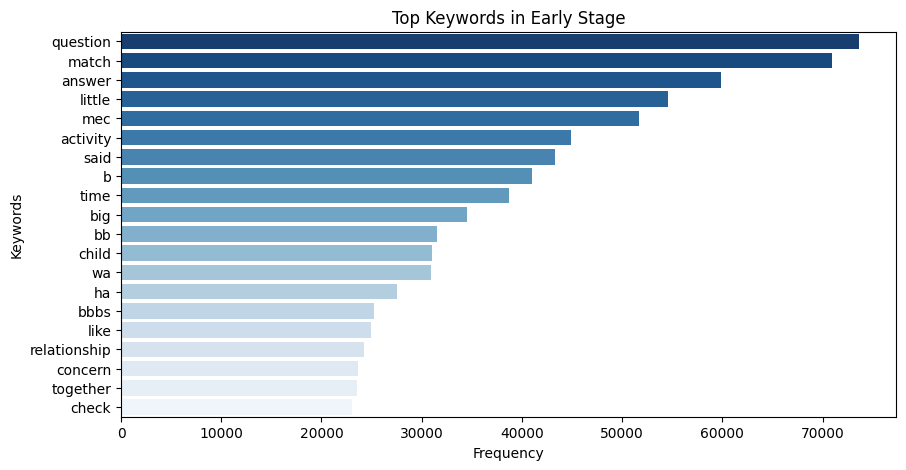

/tmp/ipykernel_8630/3611975920.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="Blues_r")


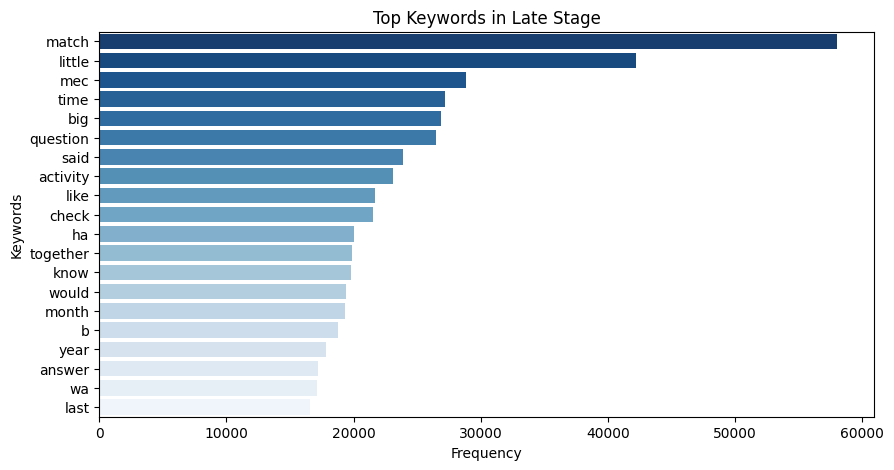

In [16]:
# Example usage:
early_keywords = extract_keywords(df, "early_stage_notes")
late_keywords = extract_keywords(df, "late_stage_notes")

plot_top_keywords(early_keywords, "Top Keywords in Early Stage")
plot_top_keywords(late_keywords, "Top Keywords in Late Stage")